# Project: Investigate a Dataset ( TMDb Movie Data )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
<ul>
<li>id  --> A unique identifier for each movie.</li>
<li>imdb_id  --> A identifier for movie in IMDB.</li>
<li>popularity  --> A numeric quantity specifying the movie popularity.</li>   
<li>budget  --> The budget in which the movie was made.</li>
<li>revenue  --> The worldwide revenue generated by the movie.</li>
<li>original_title  --> The title of the movie before translation or adaptation.</li>
<li>cast  --> The name of lead and supporting actors.</li>    
<li>homepage  --> A link to the homepage of the movie.</li>
<li>director  --> The name of Director.</li>    
<li>tagline  --> Movie's tagline.</li>   
<li>keywords --> The keywords or tags related to the movie.</li>
<li>overview  --> A brief description of the movie.</li>
<li>runtime  --> The running time of the movie in minutes.</li>
<li>genre  --> The genre of the movie, Action, Comedy ,Thriller etc.</li>
<li>production_companies  --> The production house of the movie.</li>
<li>release_date  --> The date on which it was released.</li>
<li>vote_count  --> the count of votes recieved.</li>        
<li>vote_average  --> average ratings the movie recieved.</li>
<li>release_year  --> The year on which it was released.</li>
<li>budget_adj  --> the budget of the associated movie in terms of 2010 dollars, accounting for inflation over time.</li>
<li>revenue_adj  --> the revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.</li>
</ul>


### Question(s) for Analysis
<ul> 
    <li>Which genres are most popular from year to year?</li>
    <li>What is the destribution of genres?</li>
    <li>What is the most earnings movie of each year?</li>
    <li>what is the most earnings year in termes of 2010 dollars?</li>
    <li>Does movies with high earnings have high popularity?</li>
    <li>Does movies with high earnings have high score?</li>
    <li>Which month have high earnings movie?</li>



</ul>



<a id='wrangling'></a>
## Data Wrangling

- Loading the data and investigating it to determine the required cleanning process

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
#loading the dataset
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10866.0,6.606418e+04,9.213014e+04,5.000000,10596.250000,20669.000000,7.561000e+04,4.178590e+05
popularity,10866.0,6.464410e-01,1.000185e+00,0.000065,0.207583,0.383856,7.138170e-01,3.298576e+01
budget,10866.0,1.462570e+07,3.091321e+07,0.000000,0.000000,0.000000,1.500000e+07,4.250000e+08
revenue,10866.0,3.982332e+07,1.170035e+08,0.000000,0.000000,0.000000,2.400000e+07,2.781506e+09
runtime,10866.0,1.020709e+02,3.138141e+01,0.000000,90.000000,99.000000,1.110000e+02,9.000000e+02
vote_count,10866.0,2.173897e+02,5.756191e+02,10.000000,17.000000,38.000000,1.457500e+02,9.767000e+03
vote_average,10866.0,5.974922e+00,9.351418e-01,1.500000,5.400000,6.000000,6.600000e+00,9.200000e+00
release_year,10866.0,2.001323e+03,1.281294e+01,1960.000000,1995.000000,2006.000000,2.011000e+03,2.015000e+03
budget_adj,10866.0,1.755104e+07,3.430616e+07,0.000000,0.000000,0.000000,2.085325e+07,4.250000e+08
revenue_adj,10866.0,5.136436e+07,1.446325e+08,0.000000,0.000000,0.000000,3.369710e+07,2.827124e+09


In [6]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### Datatype checking:
 <ul><li> All IDs should be string as no mathematical operations will be performed on them</li>
    <li>Drop features that aren't consistent or aren't relevant to our questions.</li>
    </ul>

In [7]:
df["id"] = df["id"].astype(str)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  object 
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [9]:
df.drop(["imdb_id","homepage","keywords","tagline","overview","cast","director","runtime","production_companies"],axis=1,inplace=True)

In [10]:
df.head()

,id,popularity,budget,revenue,original_title,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Adding  a new columns:
- Column contain the month and the day on which the movie release.
- Column contain the score of each movie calulated from average and count of votes.
- Column contain movie earnings which is the diffenent between budget and revenue.
- Column contain movie earnings which is the diffenent between budget and revenue in terms of 2010 dollars.

In [11]:
df["release_month"] = df["release_date"].apply(lambda x:x.split("/")[0])
df["release_day"] = df["release_date"].apply(lambda x:x.split("/")[1])
df.drop("release_date",axis=1,inplace=True)

In [12]:
df.head()

,id,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_day
0,135397,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,6,9
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,5,13
2,262500,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,3,18
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,12,15
4,168259,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,4,1


In [13]:
def score_calc(cols):
    avg = cols[0]
    count = cols[1]
    #score = (avg*count)/10
    score = (avg*count)/(avg+count)
    return score 

In [14]:
df["score"] = df[["vote_average","vote_count"]].apply(score_calc,axis=1)

In [15]:
df.sort_values(by="score",ascending=False)

,id,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_day,score
4178,278,7.192039,25000000,28341469,The Shawshank Redemption,Drama|Crime,5754,8.4,1994,3.677779e+07,4.169346e+07,9,10,8.387755
7269,238,5.738034,6000000,245066411,The Godfather,Drama|Crime,3970,8.3,1972,3.128737e+07,1.277914e+09,3,15,8.282684
650,244786,4.780419,3300000,13993093,Whiplash,Drama|Music,2372,8.2,2014,3.039600e+06,1.288891e+07,10,10,8.171750
2875,155,8.466668,185000000,1001921825,The Dark Knight,Drama|Action|Crime|Thriller,8432,8.1,2008,1.873655e+08,1.014733e+09,7,16,8.092226
2409,550,8.947905,63000000,100853753,Fight Club,Drama,5923,8.1,1999,8.247033e+07,1.320229e+08,10,14,8.088938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,86101,0.041297,0,0,The Sleeper,Horror|Comedy|Thriller,10,2.2,2012,0.000000e+00,0.000000e+00,1,31,1.803279
7220,31117,0.157959,0,9109322,Superbabies: Baby Geniuses 2,Family|Comedy,11,2.1,2004,0.000000e+00,1.051621e+07,8,27,1.763359
4882,120846,0.079281,0,0,Jurassic Shark,Action|Horror|Science Fiction,13,2.0,2012,0.000000e+00,0.000000e+00,9,21,1.733333
10865,22293,0.035919,19000,0,Manos: The Hands of Fate,Horror,15,1.5,1966,1.276423e+05,0.000000e+00,11,15,1.363636


### Note:
Some of budget and revenue value contains a 0 which it not logic to calculate the earnings for a movie built on this so at this condition it will be 0.
- The same for budget_adj and revenue_adj.

In [16]:
def earnings_calc(cols):
    budget = cols[0]
    revenue = cols[1]
    if (budget != 0) and (revenue != 0) : 
        earnings = revenue - budget 
    else :
        earnings = 0 
    return earnings     

In [17]:
df["earnings"] = df[["budget","revenue"]].apply(earnings_calc,axis=1)

In [18]:
df["earnings_adj"] = df[["budget_adj","revenue_adj"]].apply(earnings_calc,axis=1)

In [19]:
df.head()

,id,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_day,score,earnings,earnings_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,6,9,6.492413,1363528810,1.254446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,5,13,7.091859,228436354,2.101614e+08
2,262500,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,3,18,6.284037,185238201,1.704191e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,12,15,7.489386,1868178225,1.718723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,4,1,7.281962,1316249360,1.210949e+09


### Data Cleaning 

In [20]:
df.head(1)

,id,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_day,score,earnings,earnings_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,6,9,6.492413,1363528810,1.254446e+09


So all Movies with more than one genres type like the one above will have a string that holds many values - one for each.
- First check if there is null and drop them.

In [21]:
df["genres"].isnull().sum()

23

In [22]:
df = df.drop(df[df["genres"].isnull()].index)

In [23]:
df["genres"].isnull().sum()

0

In [24]:
df['genres'] = df['genres'].str.split('["|":]')

In [25]:
df = df.explode('genres').reset_index(drop=True)
df.head()

,id,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_day,score,earnings,earnings_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Action,5562,6.5,2015,1.379999e+08,1.392446e+09,6,9,6.492413,1363528810,1.254446e+09
1,135397,32.985763,150000000,1513528810,Jurassic World,Adventure,5562,6.5,2015,1.379999e+08,1.392446e+09,6,9,6.492413,1363528810,1.254446e+09
2,135397,32.985763,150000000,1513528810,Jurassic World,Science Fiction,5562,6.5,2015,1.379999e+08,1.392446e+09,6,9,6.492413,1363528810,1.254446e+09
3,135397,32.985763,150000000,1513528810,Jurassic World,Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,6,9,6.492413,1363528810,1.254446e+09
4,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Action,6185,7.1,2015,1.379999e+08,3.481613e+08,5,13,7.091859,228436354,2.101614e+08


<a id='eda'></a>
## Exploratory Data Analysis

## Histograms

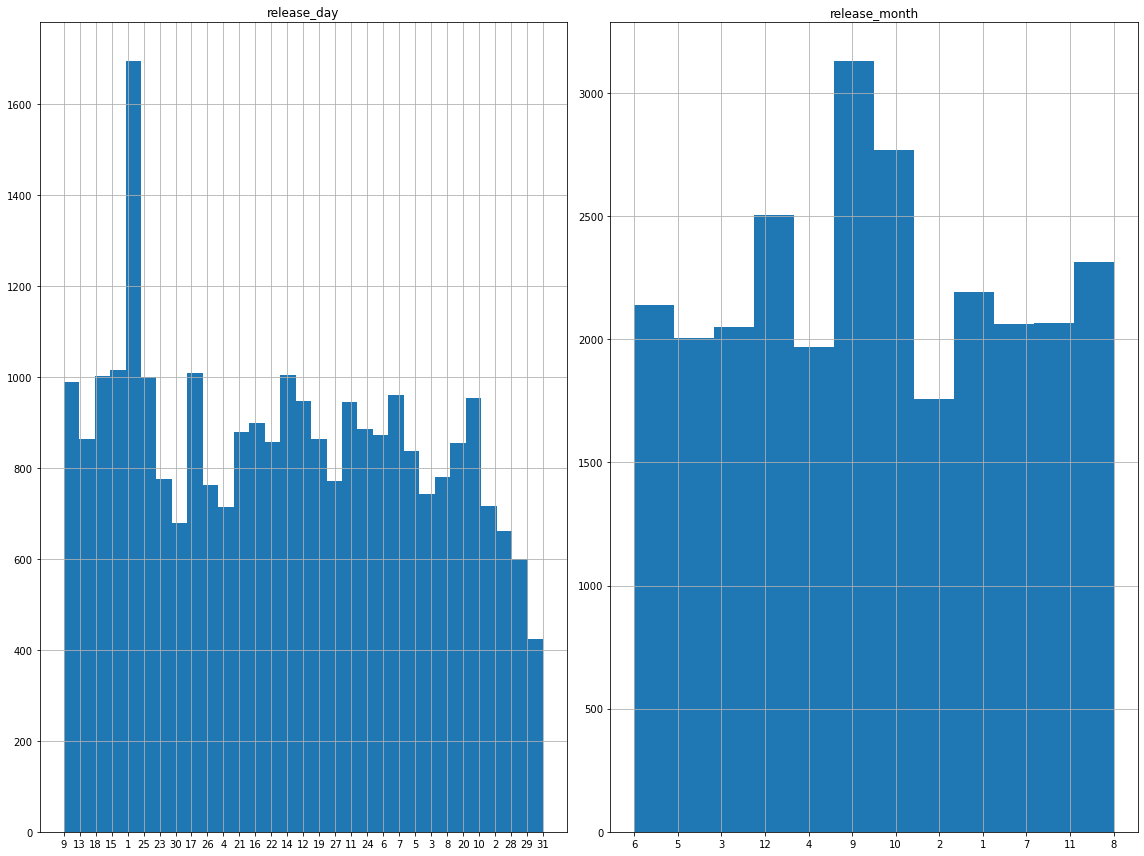

In [26]:
# Subplot
plt.figure(figsize=(16,12));
plt.subplot(1,2,1);
df["release_day"].hist(bins=31);
plt.title('release_day');

plt.subplot(1,2,2);
df["release_month"].hist(bins=12);
plt.title('release_month');

plt.tight_layout();

### Which genres are most popular from year to year?

In [27]:
df2 = pd.DataFrame(df.groupby(['release_year'])['genres'].value_counts())
x=[]
for i in range(len(df2)) :
    x.append(df2["genres"].iloc[i])

In [28]:
df2["count"] = x
idx = df2.groupby("release_year")['count'].transform(max) == df2["count"] 

In [29]:
df2[idx].drop("count",axis=1)

genres
release_year genres        
1960         Drama       13
1961         Drama       16
1962         Drama       21
1963         Comedy      13
             Drama       13
1964         Drama       20
1965         Drama       20
1966         Comedy      16
             Drama       16
1967         Comedy      17
1968         Drama       20
1969         Drama       13
1970         Drama       19
1971         Drama       30
1972         Drama       16
1973         Drama       31
1974         Drama       21
1975         Drama       17
1976         Drama       22
1977         Drama       24
1978         Drama       29
1979         Drama       30
1980         Drama       32
1981         Drama       32
1982         Drama       33
1983         Drama       35
1984         Drama       40
1985         Comedy      51
1986         Drama       51
1987         Comedy      57
1988         Comedy      69
1989         Comedy      63
1990         Drama       60
1991         Drama       63
1992         Drama       65
1993         Drama       90
1994         Comedy      88
1995         Drama       93
1996         Drama      104
1997         Drama       83
1998         Drama      108
1999         Drama      113
2000         Drama      101
2001         Comedy     101
2002         Drama      130
2003         Comedy     111
2004         Drama      141
2005         Drama      182
2006         Drama      197
2007         Drama      197
2008         Drama      233
2009         Drama      224
2010         Drama      211
2011         Drama      214
2012         Drama      232
2013         Drama      253
2014         Drama      284
2015         Drama      260

### What is the destribution of genres?

In [30]:
df["genres"].value_counts()

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

Maximun genres is Drama with 4761
Minimum genres is Western with 165


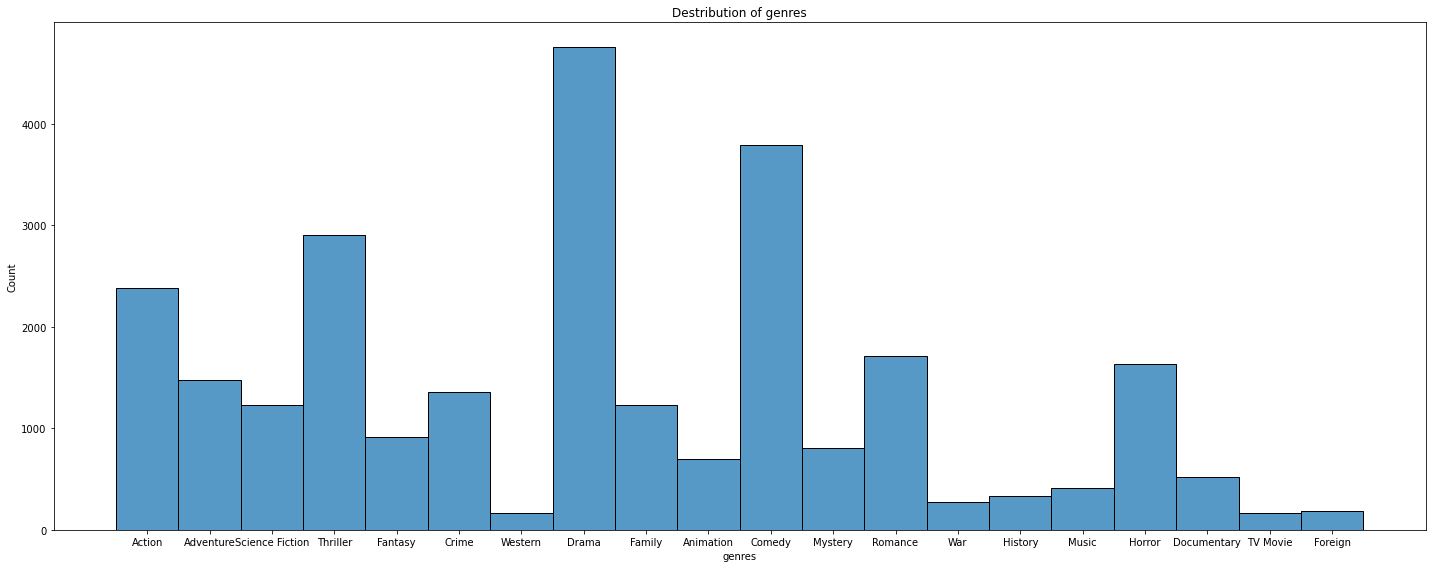

In [31]:
print("Maximun genres is Drama with",df["genres"].value_counts().max())
print("Minimum genres is Western with",df["genres"].value_counts().min())

plt.figure(figsize=(20,8))
sns.histplot(df["genres"]);
plt.title("Destribution of genres");
plt.tight_layout();

### What is the most earnings movie of each year?

In [32]:
idx = df.groupby(['release_year'])['earnings'].transform(max) == df["earnings"]

In [33]:
df[idx].drop_duplicates("original_title")[["release_year","original_title"]].sort_values("release_year")

,release_year,original_title
25071,1960,Spartacus
24990,1961,One Hundred and One Dalmatians
24302,1962,Dr. No
25839,1963,From Russia With Love
24384,1964,Goldfinger
26496,1965,The Sound of Music
26846,1966,Who's Afraid of Virginia Woolf?
25741,1967,The Jungle Book
23968,1968,2001: A Space Odyssey
26590,1969,Butch Cassidy and the Sundance Kid


### What is the most earnings year in termes of 2010 dollars?

In [34]:
most_earnings_movie = df[df["earnings_adj"] == df["earnings_adj"].max()].drop_duplicates("original_title")
most_earnings_movie

,id,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_day,score,earnings,earnings_adj
2856,11,12.037933,11000000,775398007,Star Wars,Adventure,4428,7.9,1977,3.957559e+07,2.789712e+09,3,20,7.885931,764398007,2.750137e+09


Star Wars at 1977 is the most earnings movie in in termes of 2010 dollars.

### Does movies with high earnings have high popularity?

In [35]:
df2 = df.drop_duplicates("original_title")

In [36]:
df2.sort_values("earnings",ascending=False)[["earnings","popularity"]]

,earnings,popularity
3003,2544505847,9.432768
11,1868178225,11.173104
12579,1645034188,4.355219
0,1363528810,32.985763
15,1316249360,9.335014
...,...,...
11902,-99999750,1.653031
8354,-111007242,0.921653
16937,-119180039,0.948560
13330,-165710090,1.214510


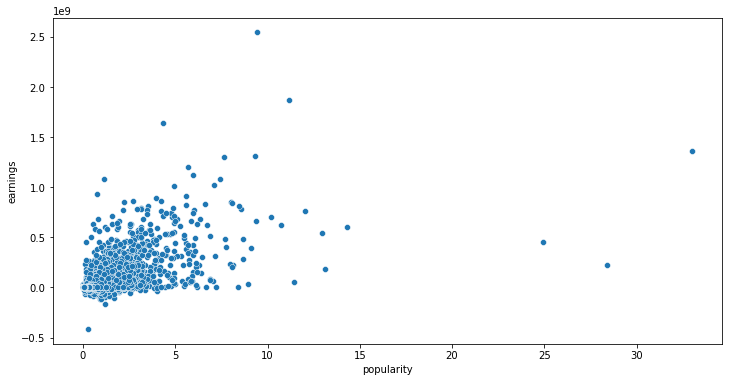

In [37]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="popularity",y="earnings",data=df2);

### Does movies with high earnings have high score?

In [38]:
df2.sort_values("earnings",ascending=False)[["earnings","score"]]

,earnings,score
3003,2544505847,7.094045
11,1868178225,7.489386
12579,1645034188,7.288568
0,1363528810,6.492413
15,1316249360,7.281962
...,...,...
11902,-99999750,6.739142
8354,-111007242,5.275093
16937,-119180039,5.371775
13330,-165710090,5.977681


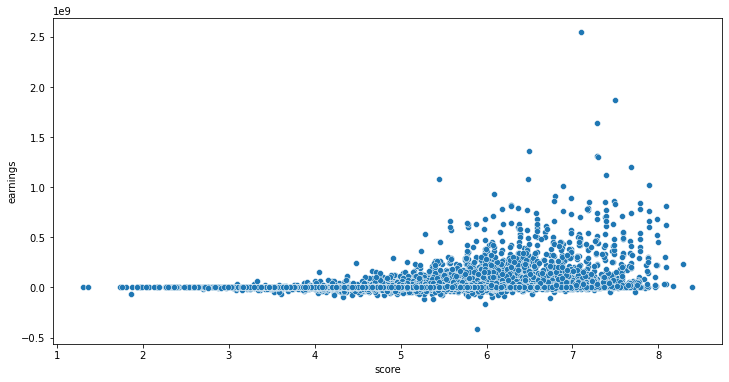

In [39]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="score",y="earnings",data=df2);

In [40]:
df.sort_values("earnings",ascending=False)[["release_year","earnings","original_title","genres"]].head(51)

,release_year,earnings,original_title,genres
3005,2009,2544505847,Avatar,Fantasy
3006,2009,2544505847,Avatar,Science Fiction
3003,2009,2544505847,Avatar,Action
3004,2009,2544505847,Avatar,Adventure
12,2015,1868178225,Star Wars: The Force Awakens,Adventure
14,2015,1868178225,Star Wars: The Force Awakens,Fantasy
13,2015,1868178225,Star Wars: The Force Awakens,Science Fiction
11,2015,1868178225,Star Wars: The Force Awakens,Action
12579,1997,1645034188,Titanic,Drama
12580,1997,1645034188,Titanic,Romance


In [41]:
df.sort_values("earnings",ascending=False)[["release_year","earnings","original_title","genres"]].head(51).value_counts("genres")

genres
Adventure          12
Action             11
Science Fiction     7
Thriller            5
Fantasy             4
Family              3
Animation           2
Crime               2
Drama               2
Comedy              1
Mystery             1
Romance             1
dtype: int64

### Which month have high earnings movie?

In [42]:
idx = df.groupby(['release_month'])['earnings'].transform(max) == df["earnings"]

In [43]:
df[idx].drop_duplicates("original_title")[["release_month","original_title"]].sort_values("release_month")

,release_month,original_title
17627,1,The Empire Strikes Back
10577,10,Skyfall
12579,11,Titanic
3003,12,Avatar
17061,2,The Passion of the Christ
4369,3,Alice in Wonderland
15,4,Furious 7
5581,5,Star Wars: Episode I - The Phantom Menace
0,6,Jurassic World
8055,7,Harry Potter and the Deathly Hallows: Part 2


In [44]:
month = pd.DataFrame(df.groupby(['release_month'])['earnings'].sum())
month["month"] = [1,10,11,12,2,3,4,5,6,7,8,9]
x=[]
for i in range(len(month)) :
    x.append(month["earnings"].iloc[i])
month["earnings"] = x 

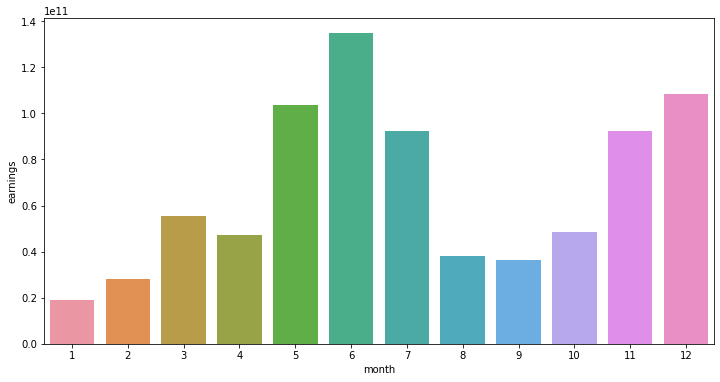

In [45]:
plt.figure(figsize=(12,6))
sns.barplot(x="month",y="earnings",data=month);

Most earnings month is June.

<a id='conclusions'></a>
## Conclusions

After exploring the dataset, I drop some features that aren't consistent or aren't relevant to our questions and a new columns has been calculated in order to share more useful insights about our dataset. Then cleaning the dataset and exclude outliers.
The most interesting finding is:
<ul> <li>Regarding the release date:</li>
    <ul><li>The most month has release movies in is september </li>
    <li>The most day has release movies in is day one</li></ul> 
	<li>Regarding to the popular at each year:</li>
<ul><li>We calculate the most popular genres of each year</li>
    <li>We calculate the most earnings movie of each year</li>
	<li>Most used genres is Drama with 4761</li>
    <li>Least used genres is Western with 165</li></ul>
<li>The most earnings movie in terms of 2010 dollar:</li>
<ul><li>Star Wars at 1977 is the most earnings movie in in termes of 2010 dollars.</li> </ul>
<li>Regarding earnings and popularity and scoreing:</li>
<ul><li>popularity doesn't make big change for earnings</li> 
<li>scoring aslo doesn't really affect much to earnings</li></ul>
<li>Regarding Month with high earnings:</li>
<ul><li>The month with the highest earnings is June.</li></ul>
</ul>